In [1]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os
import math

<AxesSubplot:title={'center':'Gemiddelde deep learning score per pickpoint'}, ylabel='Pickpoint'>

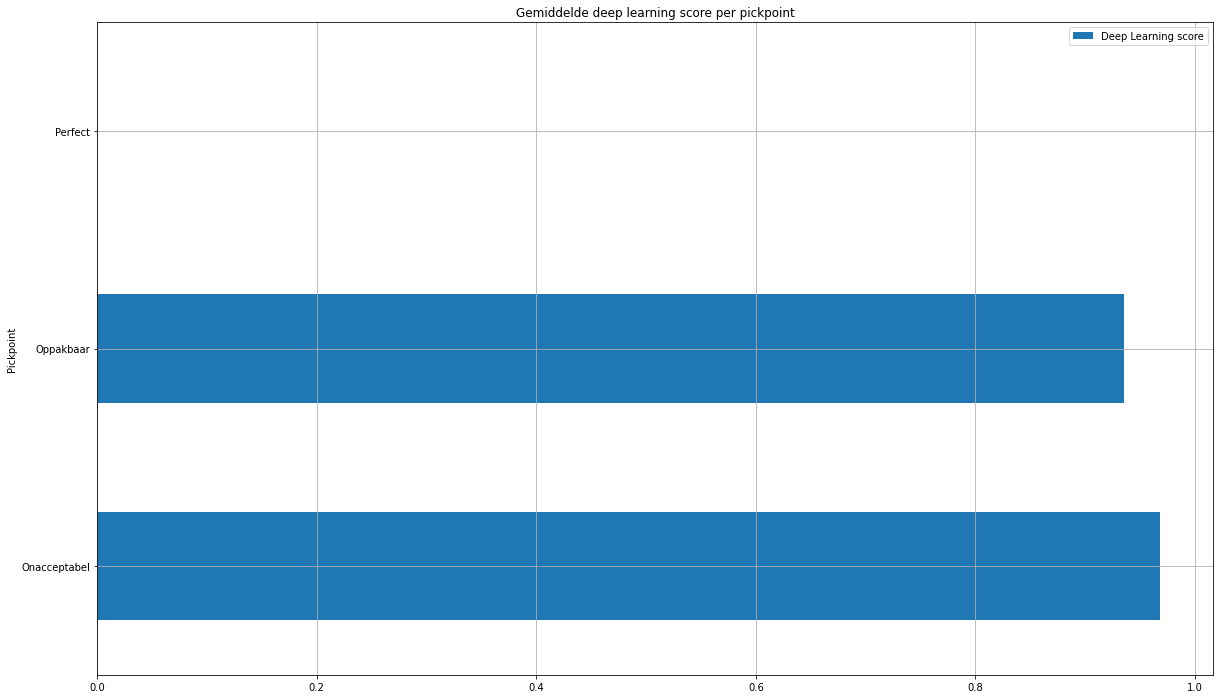

In [2]:
#This program plots a graph with the average deep learning score per pickpoint 
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
j = 0

#arrays to store all values
dl_scores = []
pick = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the D (deep learning) and I column (pickpoints)
    df = pd.read_excel(sheet, usecols="D")
    df1 = pd.read_excel(sheet, usecols="I")
    #Loop over all the values of the d column
    for x in range(25):
        #insert each value in list
        dl_scores.insert(i, df.iat[x,0])
        i = i + 1
    #Loop over all the values of the I column
    for x in range(25):
        #insert each value in list
        pick.insert(j, df1.iat[x,0])
        j = j + 1

#Variables to store all the dl scores
on_counter = 0
on_value = 0

op_counter = 0
op_value = 0

per_counter = 0
per_value = 0

z = 0
#For each pickpoint in the pick list
for loc in pick:
    #Check which pickpoint we encounter
    if loc == "onacceptabel":
        #Add counter
        
        #Check if we encounter a NaN(Not a number)
        if math.isnan(dl_scores[z]):
            on_value = on_value + 0
            on_counter = on_counter + 0
        else:
            #Else add all the dl scores
            on_value = on_value + dl_scores[z]
            on_counter = on_counter + 1
    elif loc == "oppakbaar":
        op_counter = op_counter + 1
        #Check if we have a float
        if isinstance(dl_scores[z], float):
            op_value = op_value + dl_scores[z]
        else:
            op_value = op_value + 0
    else:
        per_counter = per_counter + 1
        if isinstance(dl_scores[z], float):
            per_value = per_value + dl_scores[z]
        else:
            per_value = per_value + 0

    z = z + 1


#Calculate the average dl score per pickpoint
dl_on = on_value/on_counter
dl_op = op_value/op_counter
dl_per = per_value/per_counter

#Store in dl list
dl = [dl_on, dl_op, dl_per]
#Create dataframe
df = pd.DataFrame()
#Add two columns with the names and the corresponding values
df['Deep Learning score'] = dl
df['Pick'] = ["Onacceptabel", "Oppakbaar", "Perfect"]
#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Pick', kind="barh", figsize=(20,12), xlabel="Pickpoint", ylabel = "Values", title="Gemiddelde deep learning score per pickpoint", grid=True)